In [1]:
!pip install xgboost

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump


In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [3]:
model = XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators = 1000, early_stopping_rounds=5,)

In [4]:
model.fit(X_train, y_train,  verbose = True, eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.46992
[1]	validation_0-logloss:0.44268
[2]	validation_0-logloss:0.42373
[3]	validation_0-logloss:0.41195
[4]	validation_0-logloss:0.40191
[5]	validation_0-logloss:0.39524
[6]	validation_0-logloss:0.38998
[7]	validation_0-logloss:0.38028
[8]	validation_0-logloss:0.37566
[9]	validation_0-logloss:0.37082
[10]	validation_0-logloss:0.36651
[11]	validation_0-logloss:0.36430
[12]	validation_0-logloss:0.36138
[13]	validation_0-logloss:0.35740
[14]	validation_0-logloss:0.35539
[15]	validation_0-logloss:0.35396
[16]	validation_0-logloss:0.35270
[17]	validation_0-logloss:0.35101
[18]	validation_0-logloss:0.34865
[19]	validation_0-logloss:0.34789
[20]	validation_0-logloss:0.34672
[21]	validation_0-logloss:0.34554
[22]	validation_0-logloss:0.34474
[23]	validation_0-logloss:0.34386
[24]	validation_0-logloss:0.34318
[25]	validation_0-logloss:0.34266
[26]	validation_0-logloss:0.34210
[27]	validation_0-logloss:0.34108
[28]	validation_0-logloss:0.34042
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [5]:
y_pred = model.predict(X_test)

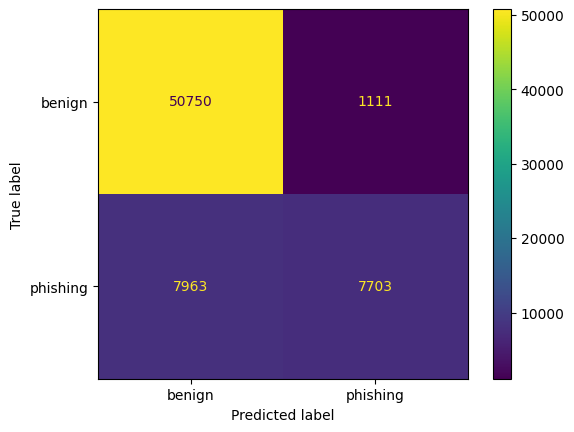

In [6]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [7]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [8]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8656241207220815, 'Precision': 0.8739505332425687, 'Recall': 0.4917017745435976, 'F1_score': 0.6293300653594771}


In [9]:
df = pd.read_csv("../Metrics of Dataset #1.csv")

In [10]:
metrics = pd.DataFrame({"Model": "XGBoost", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [11]:
df = pd.concat([df, metrics], ignore_index=True)

In [12]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.796126,0.834921,0.151092,0.255878
1,Random Forest,0.870822,0.871482,0.519852,0.651233
2,XGBoost,0.865624,0.873951,0.491702,0.629330


In [13]:
df.to_csv("../Metrics of Dataset #1.csv", index=False)

In [14]:
dump(model, 'XGBoost #1.joblib')

['XGBoost #1.joblib']